<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [19]:
df = pd.read_csv ("smite_items.csv")

In [35]:
df.shape

(261, 7)

In [39]:
#this is really hard to read!!!
print (df.head())

              Item                               Item_Type Item_Tier   Cost  \
0  Sentinel's Gift             Starter, Defensive, Utility    Tier 1  550.0   
1      Benevolence             Starter, Defensive, Utility    Tier 1  600.0   
2   Bumba's Dagger             Starter, Defensive, Utility    Tier 1  600.0   
3    Tainted Steel           Starter, Offensive, Defensive    Tier 1  600.0   
4         War Flag  Starter, Offensive, Defensive, Utility    Tier 1  600.0   

   Total_Cost                                              Stats  \
0         NaN  +10 Physical Protection +10 Magical Protection...   
1         NaN                         +75 Health +10 MP5 +10 HP5   
2         NaN  +13 Physical Power +25 Magical Power +50 Healt...   
3         NaN  +15 Physical Power +25 Magical Power +15 Physi...   
4         NaN  +10 Physical Protection +10 Magical Protection...   

                                      Passive_Effect  
0  Getting the assist for an enemy minion or jung...  
1  Whi

In [63]:
# trying to remove truncation and see the 7 columns in 1 line 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display
display(df.head())
display(df.tail())

,Item,Item_Type,Item_Tier,Cost,Total_Cost,Stats,Passive_Effect
0,Sentinel's Gift,"Starter, Defensive, Utility",Tier 1,550.0,NaN,+10 Physical Protection +10 Magical Protection +75 Health +7 MP5,Getting the assist for an enemy minion or jungle monster dying will provide 8 Bonus gold and restore 12 Health and 8 Mana. If you are not within 30 units of an allied god for 20 seconds this passive is disabled until you are near an allied god again. Can be upgraded at level 15.
1,Benevolence,"Starter, Defensive, Utility",Tier 1,600.0,NaN,+75 Health +10 MP5 +10 HP5,"While not near an ally god you gain 1 stack of Benevolence every second, up to a maximum of 50. Assists provide 4 stacks. While within 70 units of a hurt ally god you use up to 5 stacks a second to heal them and yourself for 0.6% of your Maximum Health. Each stack consumed provides you with 1 gold. If you overcap stacks they will still provide gold as long as you are near an ally god. Can be upgraded at level 15."
2,Bumba's Dagger,"Starter, Defensive, Utility",Tier 1,600.0,NaN,+13 Physical Power +25 Magical Power +50 Health +50 Mana,Your Basic Attacks deal +25 True Damage and your Abilities deal +35% Damage versus Jungle Monsters. When a Jungle Monster is killed you are restored for 10% of the Monster's Health and 25 Mana. Can be upgraded at level 20.
3,Tainted Steel,"Starter, Offensive, Defensive",Tier 1,600.0,NaN,+15 Physical Power +25 Magical Power +15 Physical Protection +15 Magical Protection,Enemy Gods that you hit have their healing taken reduced by 20% for 5s. You are healed for 120% of the healing reduced. Can be upgraded at level 20.
4,War Flag,"Starter, Offensive, Defensive, Utility",Tier 1,600.0,NaN,+10 Physical Protection +10 Magical Protection +100 Health +10 MP5,Getting the assist for an enemy minion or jungle monster dying will provide 8 Bonus gold and restore 8 Health and 5 Mana. You and nearby allied gods also receive a stack that gives 1% Movement Speed and 2% Attack Speed for 10s to nearby allies up to 10 stacks. Can be upgraded at level 15.


,Item,Item_Type,Item_Tier,Cost,Total_Cost,Stats,Passive_Effect
256,Evolved Prophetic Cloak,"Defensive, Utility",Evolved,NaN,NaN,+40 Physical Protection +40 Magical Protection +100 Health +10% Cooldown Reduction,"AURA - Allies within 70 units gain 20 Physical and Magical Protections. If you have over 325 total Protections, you gain 7.5% Damage Mitigation. If you have over 525 total Protections, you gain an additional 7.5% Damage Mitigation."
257,Evolved Rage,Offensive,Evolved,NaN,NaN,+45 Physical Power +45% Critical Strike Chance,NaN
258,Evolved Soul Eater,"Offensive, Utility",Evolved,NaN,NaN,+50 Physical Power +15% Physical Lifesteal +10 Physical Penetration +10% Cooldown Reduction,Your abilities heal you for 15% of the damage dealt to targets.
259,Evolved Transcendence,"Offensive, Utility",Evolved,NaN,NaN,+25 Physical Power +1050 Mana +10 MP5 +10 Physical Penetration,You gain Physical Power equal to 2% of your Maximum Mana.
260,Evolved Warlock's Staff,"Offensive, Defensive, Utility",Evolved,NaN,NaN,+80 Magical Power +400 Health +200 Mana +10% Magical Penetration,NaN


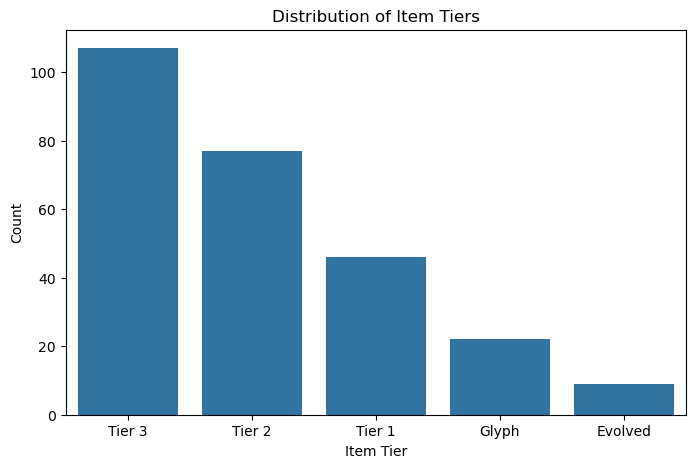

In [69]:
# Plot the distribution of item tiers
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Item_Tier', order=df['Item_Tier'].value_counts().index)
plt.title('Distribution of Item Tiers')
plt.xlabel('Item Tier')
plt.ylabel('Count')
plt.show()

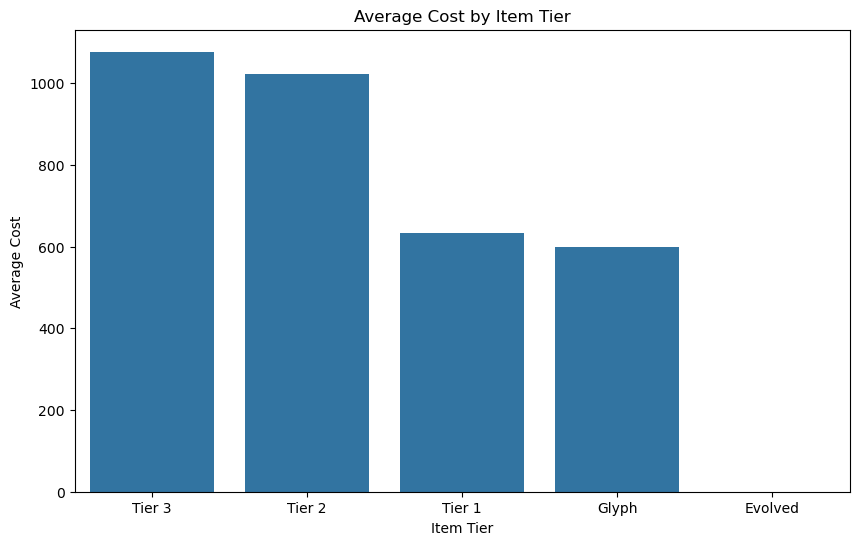

In [75]:
# Barplot of Average Cost by Item Tier
# Evolved items have no cost as they "evolve" from a tier 3 item by completing a task in game i.e do x damage to enemy gods once the tier 3 is purchased
plt.figure(figsize=(10, 6))
average_cost_by_tier = df.groupby('Item_Tier')['Cost'].mean().sort_values(ascending=False)
sns.barplot(x=average_cost_by_tier.index, y=average_cost_by_tier.values)
plt.title('Average Cost by Item Tier')
plt.xlabel('Item Tier')
plt.ylabel('Average Cost')
plt.show()